In [1]:
#Тестовые функции
from math import sin, cos, exp, sqrt


def f1(x):
    return x * x / 2, x


def f2(x):
    return sum([-k*sin((k+1) * x + k) for k in range(1, 7)]), sum([-k*(k+1)*cos((k + 1) * x + k) for k in range(1, 7)])


def f3(x):
    return -(16 * x**2 - 24 * x + 5) * exp(-x), (16 * x**2 - 56 * x + 29) * exp(-x)


Метод золотого сечения для сравнения с исследуемым методом

In [2]:
def gold_ratio(f, a: float, b: float, eps: float = 1e-8):
    n_it = 0
    k = (sqrt(5) - 1) / 2
    I = b - a
    z = k*I
    x1 = b - z
    x2 = a + z
    while I > eps:
        n_it += 1
        z = k*I
        x1 = b - z
        x2 = a + z
        fx1, fx2 = f(x1)[0], f(x2)[0]
        if fx1 >= fx2:
            a = x1
        else:
            b = x2
        I = b - a
    x = (b + a) / 2
    return x, f(x)[0], n_it

Метод Брента с производной

In [3]:
from d1_optimization import optimize

In [8]:
a, b = -10, 10
print(optimize(f2, a, b), f2(optimize(f2, a, b)))
print(gold_ratio(f2, a, b))

2.0654526331291647 (-3.032006702619812, -9.007333978683363e-07)
(-0.5580997819915682, -16.53219472107331, 45)


In [9]:
from random import uniform, seed
a = uniform(-100, 100)
b = uniform(a, 1000)
print('a: ', a, ' b: ', b)
print('BRENT+DERIVATIVE:')
print(optimize(f1, a, b))
print('GOLD_RATIO:')
print(gold_ratio(f1, a, b))

a:  -80.1831150276663  b:  932.5219327048809
BRENT+DERIVATIVE:
0.0
GOLD_RATIO:
(3.530795802301539e-10, 6.233259498775084e-20, 53)


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

In [13]:
#костыль для вывода числа итераций, не возвращая их
def counter(func, *args, **kwargs):
    res = func(*args, **kwargs)
    return func.n_it


counter(optimize, f1, a, b)

4

### Графики "количество итераций vs точность" и "время работы vs точность" для параболы для отрезка $[a, b]$, содержащего минимум.

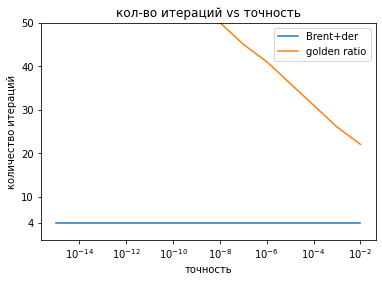

In [14]:
def it_graph(f, a, b):
    tols = [10**(-2-i) for i in range(14)]
    opt_tol = partial(counter, optimize, f, a, b)
    opt_tol_gold = partial(gold_ratio, f, a, b)
    its = [opt_tol(tol) for tol in tols]
    its_gold = [opt_tol_gold(tol)[2] for tol in tols]
    plt.plot(tols, its, label='Brent+der')
    plt.plot(tols, its_gold, label='golden ratio')
    plt.xscale('log')
    plt.ylabel('количество итераций')
    plt.xlabel('точность')
    plt.yticks([4,10,20,30,40,50])
    plt.ylim(bottom = 0, top = 50)
    plt.legend()
    plt.title('кол-во итераций vs точность')

    plt.show()



a, b = -11, 239
it_graph(f1, a, b)

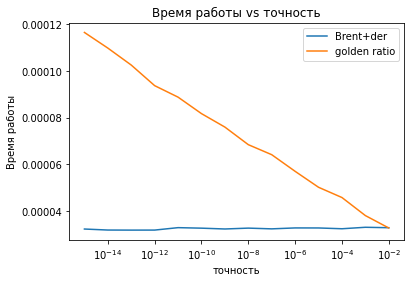

In [15]:
import time

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1-t0)
    return acc


def time_graph(f, a, b):
    tols = [10**(-2-i) for i in range(14)]
    opt_tol = partial(optimize, f, a, b)
    opt_tol_gold = partial(gold_ratio, f, a, b)
    tm = [timed(opt_tol, tol) for tol in tols]
    tm_gold = [timed(opt_tol_gold, tol) for tol in tols]

    plt.plot(tols, tm, label='Brent+der')
    plt.plot(tols, tm_gold, label='golden ratio')
    plt.xscale('log')
    plt.ylabel('Время работы')
    plt.xlabel('точность')
    plt.legend()
    plt.title('Время работы vs точность')

    plt.show()
    
    
time_graph(f1, a, b)

### Графики "количество итераций vs точность" и "время работы vs точность" для параболы для отрезка  [𝑎,𝑏], не содержащего минимум.

0.8444218515250481 7.78393262062566


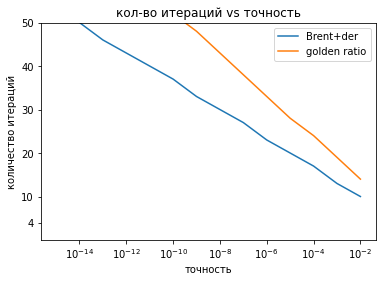

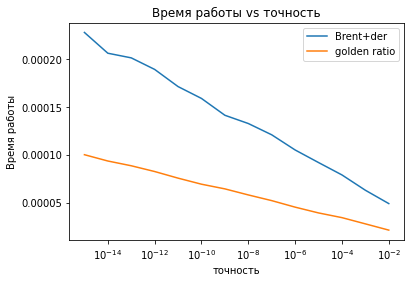

In [16]:
seed(0)
a = uniform(0, 1)
b = uniform(a, 10)
print(a, b)
it_graph(f1, a, b)
time_graph(f1, a, b)

На этом примере видно, что для монотонных на отрезке функций метод хоть и делает меньше операций, чем золотое сечение, но проигрывает ему во времени работы. Скорее всего это происходит потому, что почти на каждом шаге, например в данном случае, реализуется ситуация $a = x = u$, и метод заходит в ветку с большим количеством условий. По количеству вызовов оракула на итерацию метод выигрывает у золотого сечения (1 против 2).

### Графики для функции $f_2$ (см. начало файла) степени для отрезка, содержащего локальный минимум.

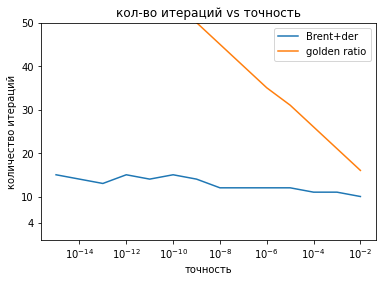

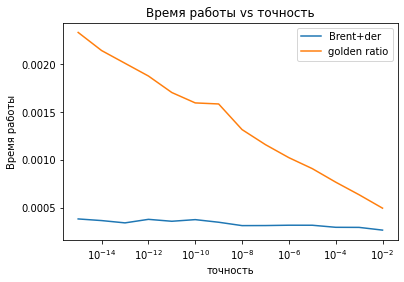

In [17]:
a, b = -10, 10
it_graph(f2, a, b)
time_graph(f2, a, b)

### Графики для $f_3$, отрезок содержит локальный минимум

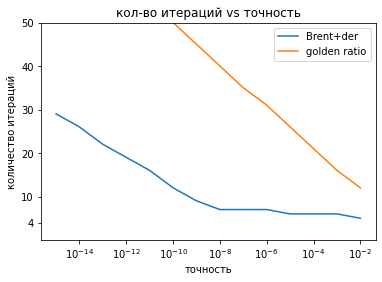

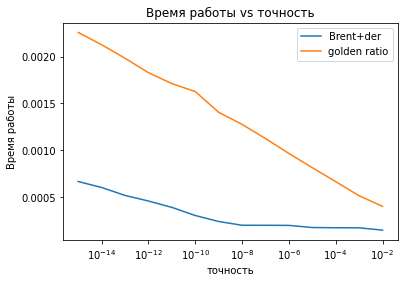

In [18]:
a, b = 1.9, 3.9
it_graph(f2, a, b)
time_graph(f2, a, b)

На примере $f_2$ можно убедиться, что метод сходится в какой-то локальный минимум. Заранее сказать в какой именно, для произвольной функции на произвольном отрезке довольно сложно, если не невозможно. 

In [19]:
a, b = -10, 10
print(optimize(f2, a, b))

2.0654526331291647
